### Data Drift: Visualizing Concept Drift
**Description**: Simulate concept drift by gradually changing the distribution of a binary target variable over simulated time periods. Plot these changes.

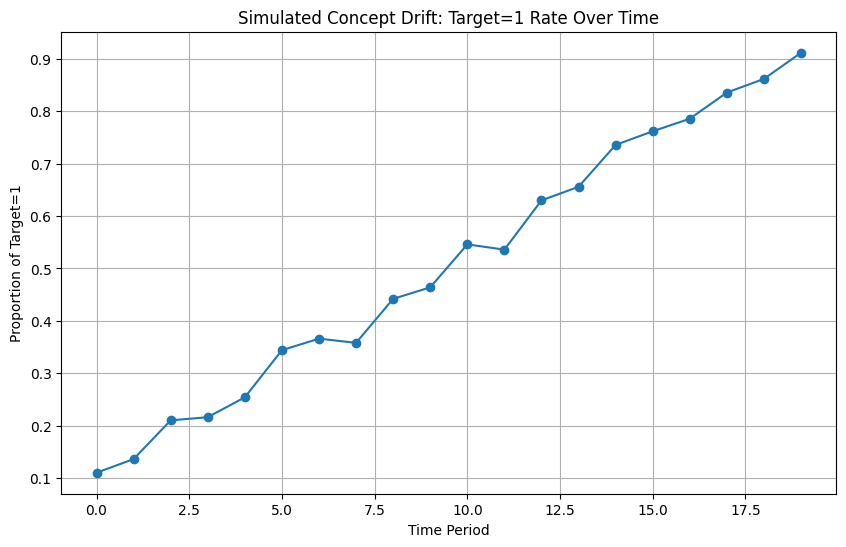

In [2]:
# write your code from here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters
np.random.seed(42)
time_periods = 20
samples_per_period = 500

data = []

# Simulate concept drift: probability of target=1 changes gradually over time
for t in range(time_periods):
    # Drift: probability increases linearly from 0.1 to 0.9 over time
    p = 0.1 + (0.8 * t / (time_periods - 1))
    targets = np.random.binomial(1, p, samples_per_period)
    df_temp = pd.DataFrame({
        'time_period': t,
        'target': targets
    })
    data.append(df_temp)

df = pd.concat(data)

# Calculate target=1 rate per time period
drift_df = df.groupby('time_period')['target'].mean().reset_index()

# Plot concept drift
plt.figure(figsize=(10, 6))
plt.plot(drift_df['time_period'], drift_df['target'], marker='o')
plt.title('Simulated Concept Drift: Target=1 Rate Over Time')
plt.xlabel('Time Period')
plt.ylabel('Proportion of Target=1')
plt.grid(True)
plt.show()
